# Esercitazione 10
**7  Maggio 2024**

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import SolveTriangular

In [4]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G= A.T@A
     
    f= A.T@b
    
    L=la.cholesky(G,lower=True) 
    U=L.T
        
   
    z,flag=SolveTriangular.Lsolve(L,f)
    x,flag=SolveTriangular.Lsolve(U,z)
    
    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [6]:
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=la.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [8]:
def SVDLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo SVD-LS
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=la.svd(A)  #Attenzione : Restituisce U, il numpy-array 1d che contiene la diagonale della matrice Sigma e VT=VTrasposta)
    #Quindi 
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c=d1/s1
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



a_EQN= [[0.62222222]
 [1.90511021]]


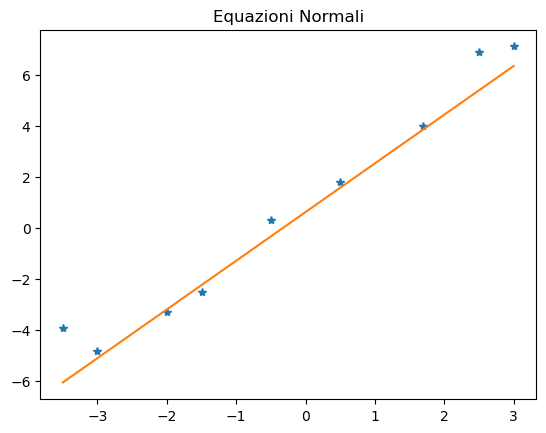

In [10]:
x = np.array([-3.5,  -3 , -2, -1.5, -0.5,  0.5,  1.7,  2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5,  0.3,  1.8,  4,  6.9,  7.1])
m=x.shape[0]
n=1
n1=n+1
A=np.vander(x,increasing=True)[:,:n1]

a_EQN=eqnorm(A,y)
print("a_EQN=",a_EQN)
xv=np.linspace(np.min(x),np.max(x),200)
pol_eqn=np.polyval(np.flip(a_EQN),xv) # flip because of the way np.polyval is defined , polyval vuole i coefficienti in ordine decrescente mentre noi li calciamo in ordine crescente
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('Equazioni Normali')
plt.show()

res= [[0.16634043]
 [0.35240144]]


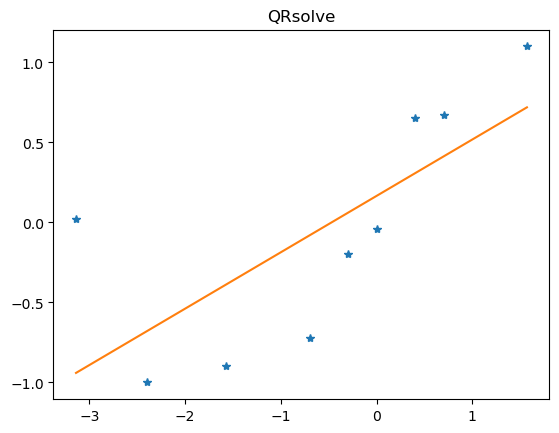

In [11]:

x_2 = np.array([-3.14,  -2.4,  -1.57, -0.7, -0.3, 0,  0.4,0.7,  1.57])
y_2 = np.array([0.02, -1, -0.9,  -0.72, -0.2, -0.04, 0.65, 0.67, 1.1])
m=x_2.shape[0]
n=1
n1=n+1
A_2=np.vander(x_2,increasing=True)[:,:n1]
res,residuo=qrLS(A_2,y_2)
print("res=",res)
xv=np.linspace(np.min(x_2),np.max(x_2),200)
pol_eqn=np.polyval(np.flip(res),xv) 
plt.plot(x_2,y_2,'*',xv,pol_eqn)
plt.title('QRsolve')
plt.show()

rango= 2
res= [[1.21492318]
 [1.90511021]]


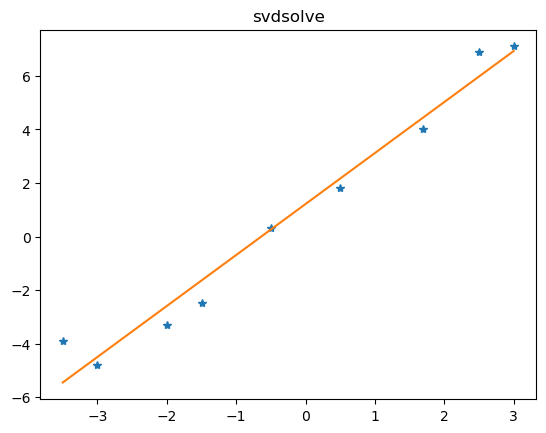

In [12]:
x_3 = np.array([1.001, 1.004, 1.005,1.0012,1.0013, 1.0014, 1.0015, 1.0016]) 
y_3 = np.array([-1.2, -0.95, -0.9, -1.15, -1.1, -1])
m=x_3.shape[0]
n=1
n1=n+1
A_3=np.vander(x,increasing=True)[:,:n1]
res,residuo=SVDLS(A_3,y)
print("res=",res)
xv=np.linspace(np.min(x),np.max(x),200)
pol_eqn=np.polyval(np.flip(res),xv)
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('svdsolve')
plt.show()

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



condizione di A=4.663458e+00
a_EQN= [[0.02152   ]
 [0.00214393]]


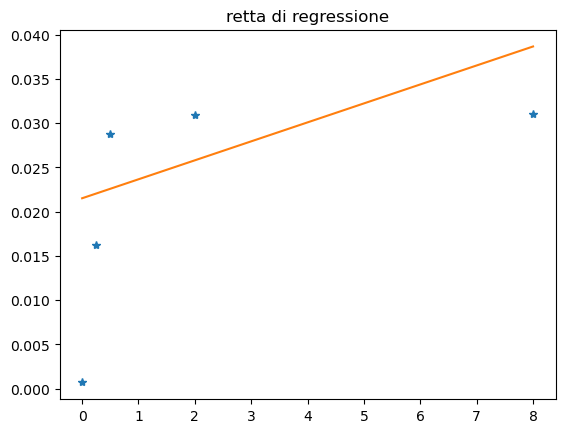

In [14]:
x = np.array([0.0004,  0.2507,  0.5008,  2.0007,  8.0013])  
y = np.array([0.0007,  0.0162, 0.0288, 0.0309, 0.0310])
m=x.shape[0]
n=1 # faccio la retta grado 1
n1=n+1
A=np.vander(x,increasing=True)[:,:n1]
print("condizione di A={:e}".format(np.linalg.cond(A)))
# la matrice è ben condizionata quindi posso utilizzare il metodo delle equazioni normali
a_EQN=eqnorm(A,y)
print("a_EQN=",a_EQN)
xv=np.linspace(np.min(x),np.max(x),100)
pol_eqn=np.polyval(np.flip(a_EQN),xv)
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('retta di regressione')
plt.show()


condizione di A=6.567494e+01
a_EQN= [[ 0.01032651]
 [ 0.01541114]
 [-0.00160619]]


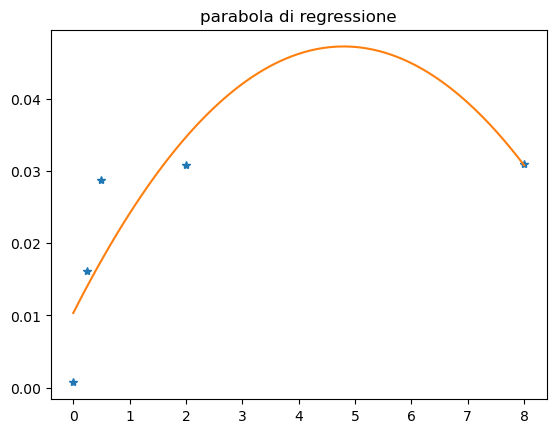

In [15]:
n=2 # faccio la parabola grado 2
n1=n+1
A=np.vander(x,increasing=True)[:,:n1]
print("condizione di A={:e}".format(np.linalg.cond(A)))
# la matrice è ben condizionata quindi posso utilizzare il metodo delle equazioni normali
a_EQN,res=qrLS(A,y)
print("a_EQN=",a_EQN)
xv=np.linspace(np.min(x),np.max(x),100)
pol_eqn=np.polyval(np.flip(a_EQN),xv)
plt.plot(x,y,'*',xv,pol_eqn)
plt.title('parabola di regressione')
plt.show()

## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



condizione di A=3.565470e+11
a_EQN= [[ 11.13496667]
 [  0.28028571]
 [ -0.56214286]
 [  2.3239748 ]
 [-24.30065701]]
rango= 5


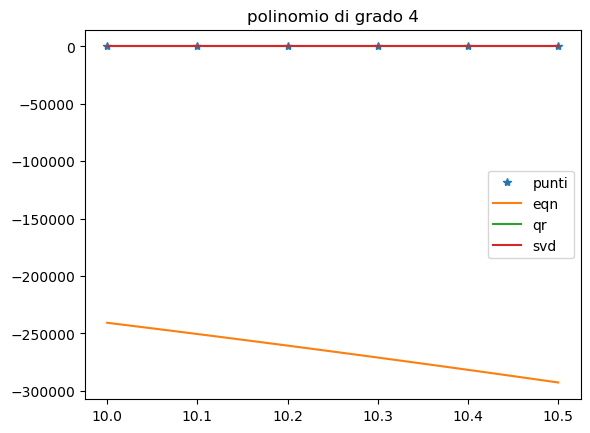

In [17]:
x = np.arange(10,10.6,0.5/5)
y = np.array([11.0320, 11.1263,  11.1339, 11.1339, 11.1993, 11.1844])
m=x.shape[0]
n=4 # grado richiesto dal problema
n1=n+1
A=np.vander(x,increasing=True)[:,:n1]
print("condizione di A={:e}".format(np.linalg.cond(A)))
# la matrice è molto mal condizionata 
a_EQN=eqnorm(A,y)
print("a_EQN=",a_EQN)
xv=np.linspace(np.min(x),np.max(x),100)
pol_eqn=np.polyval(np.flip(a_EQN),xv)
plt.plot(x,y,'*',xv,pol_eqn)
#---------------------------------------------------
qr,residuo=qrLS(A,y)
pol_qr=np.polyval(np.flip(qr),xv)
plt.plot(xv,pol_qr)
#---------------------------------------------------
svd,residuo=SVDLS(A,y)
pol_svd=np.polyval(np.flip(svd),xv)
plt.plot(xv,pol_svd)
plt.title('polinomio di grado 4')
plt.legend(['punti','eqn','qr','svd'])
plt.show()
#---------------------------------------------------
# a causa del fatto che la matrice A è molto mal condizionata , il metodo eqnorm e QRsolve non sono affidabili 
# dato che l'errore si propaga troppo ed i due grafici sono sovrapposti 

x= [10.  10.1 10.2 10.3 10.4 10.5] y= [11.032  11.1263 11.1339 11.1339 11.1993 11.1844]
x_per= [10.    10.113 10.2   10.3   10.4   10.5  ] y_per= [11.032  11.1253 11.1339 11.1339 11.1993 11.1844]
condizione di A=3.805063e+11
Errore nel calcolo delle equazioni normali
rango= 5


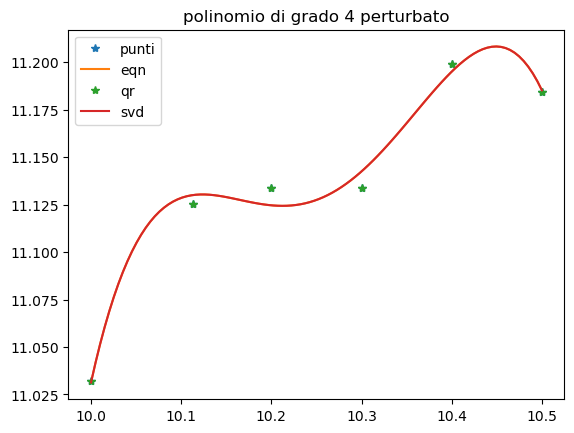

In [18]:
# ora perturbo i dati 
x_per = x.copy()
x_per[1] += 0.013
y_per = y.copy()
y_per[1] -= 0.001
print("x=",x,"y=",y)
print("x_per=",x_per,"y_per=",y_per)
A_per=np.vander(x_per,increasing=True)[:,:n1]
print("condizione di A={:e}".format(np.linalg.cond(A_per)))
# la matrice è molto mal condizionata
try:
    a_EQN=eqnorm(A_per,y_per)
    print("a_EQN=",a_EQN)
    xv=np.linspace(np.min(x_per),np.max(x_per),100)
    pol_eqn=np.polyval(np.flip(a_EQN),xv)
    plt.plot(x_per,y_per,'*',xv,pol_eqn)
except np.linalg.LinAlgError as err:
    print("Errore nel calcolo delle equazioni normali")
#---------------------------------------------------
qr,residuo=qrLS(A_per,y_per)
qrPol=np.polyval(np.flip(qr),xv)
plt.plot(x_per,y_per,'*',xv,qrPol)
#---------------------------------------------------
svd,residuo=SVDLS(A_per,y_per)
svdPol=np.polyval(np.flip(svd),xv)
plt.plot(x_per,y_per,'*',xv,svdPol)
plt.title('polinomio di grado 4 perturbato')
plt.legend(['punti','eqn','qr','svd'])
plt.show()

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [20]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

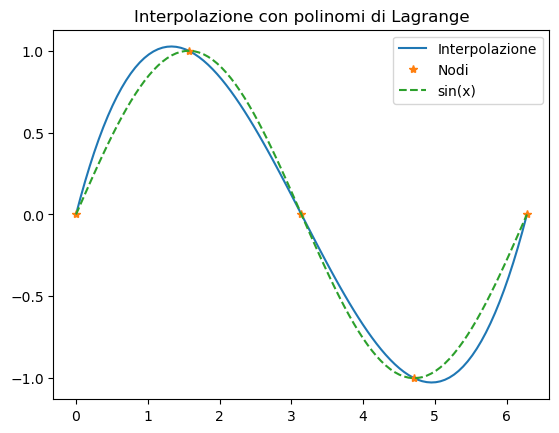

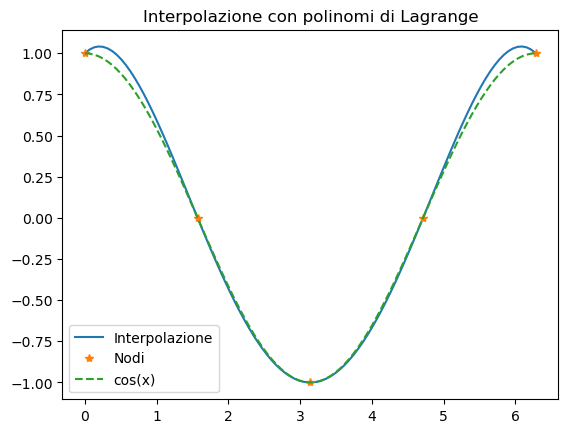

In [22]:
import math
import matplotlib.pyplot as plt
k=np.arange(0,5,1)
x = k*math.pi/2
y=np.sin(x)
xx=np.linspace(0,2*math.pi,100)

yy=InterpL(x,y,xx)
plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.plot(xx,np.sin(xx),"--")
plt.legend(['Interpolazione','Nodi','sin(x)'])
plt.title('Interpolazione con polinomi di Lagrange')
plt.show()

y=np.cos(x)
yy=InterpL(x,y,xx)
plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.plot(xx,np.cos(xx),"--")
plt.legend(['Interpolazione','Nodi','cos(x)'])
plt.title('Interpolazione con polinomi di Lagrange')
plt.show()

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

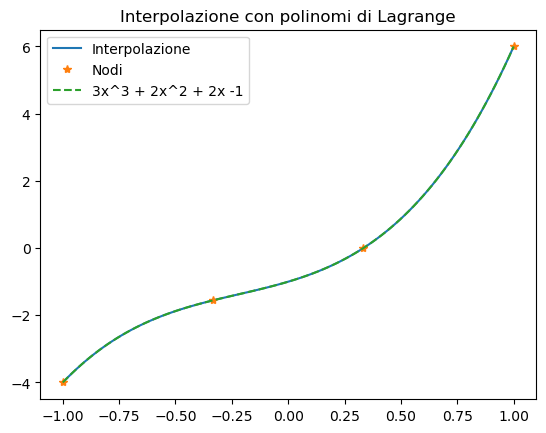

In [24]:
i = np.arange(0,4,1)
x = np.linspace(-1,1,len(i))
y = lambda x: 3*x**3 + 2*x**2 + 2*x -1
xx = np.linspace(-1,1,100)

yy = InterpL(x,y(x),xx)
plt.plot(xx,yy)
plt.plot(x,y(x),'*')
plt.plot(xx,y(xx),"--")
plt.legend(['Interpolazione','Nodi','3x^3 + 2x^2 + 2x -1'])
plt.title('Interpolazione con polinomi di Lagrange')
plt.show()
#Poichè i nodi  (xi.yi) sono ottenuti valutando una funzione che è un polinomio di grado 3
# (che ha quindi derivata quarta nulle) nei punti xi,i=0,3, è nullo l'errore che si commette quando
#alla funzione che ha generato i dati si sostituisce il polinomio interpolatore di grado 3
#Vedi formula dell'errore dell'interpolazione polinomiale nelle dispense teoriche

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


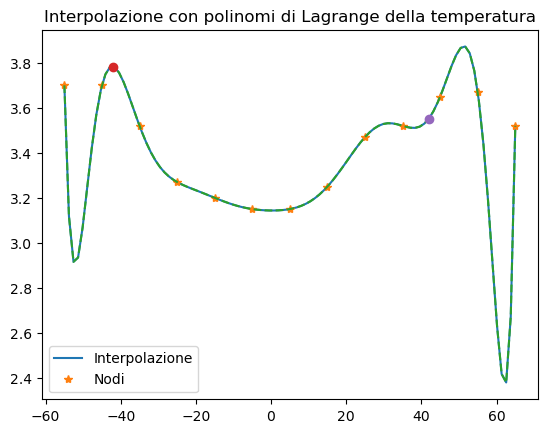

In [26]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

ll=np.linspace(np.min(L),np.max(L),100)

L1=np.array([-42])
L2=np.array([42])
interL1=InterpL(L,T,L1)
interL2=InterpL(L,T,L2)

tt=InterpL(L,T,ll)
plt.plot(ll,tt)
plt.plot(L,T,'*')
plt.plot(ll,InterpL(L,T,ll),"--")
plt.plot(L1,interL1, '-o', L2,interL2, '-o')
plt.legend(['Interpolazione','Nodi'])
plt.title('Interpolazione con polinomi di Lagrange della temperatura')
plt.show()

## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

In [28]:
def zeri_Cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    diff=[]
    x=np.zeros((n+1,))
     
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

scegli la funzione PORCODIO 1
1) equidistanti 2) di Chebyshev 1
scegli il grado del polinomio interpolante 3


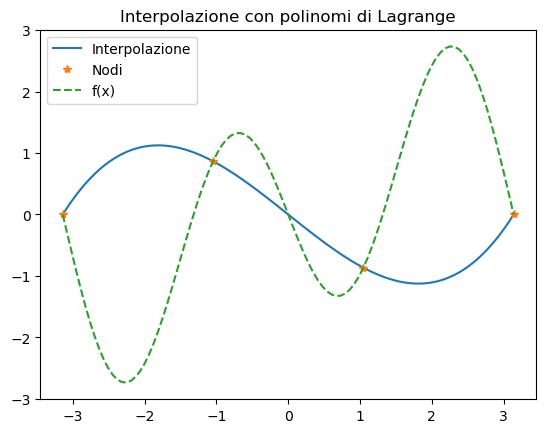

In [29]:
scelta = int(input("scegli la funzione PORCODIO"))

if scelta == 1:
    f = lambda x: math.sin(x)-2*math.sin(2*x)
    a,b = -math.pi,math.pi
elif scelta == 2:
    f = lambda x: np.sinh(x)
    a,b = -2,2
elif scelta == 3:
    f = lambda x: np.abs(x)
    a,b = -1,1
else : 
    f = lambda x: 1/(1+25*x**2)
    a,b = -1,1

scelta = int(input("1) equidistanti 2) di Chebyshev"))

xx = np.linspace(a,b,100)
n = int(input("scegli il grado del polinomio interpolante"))
if scelta == 1:
    x = np.linspace(a,b,n+1)
else :
    x = zeri_Cheb(a,b,n)

y = np.array([f(xi) for xi in x])

yy = InterpL(x,y,xx)

plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.plot(xx,np.array([f(x1) for x1 in xx]),"--")
plt.legend(['Interpolazione','Nodi','f(x)'])
plt.title('Interpolazione con polinomi di Lagrange')
plt.show()

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

In [31]:
def getChebyshevNodes(n):
    nodes=[]
    for i in range(n+1):
        nodes.append(math.cos((2*i+1)/(2*(n+1))*math.pi))
    return nodes
def getEquidistantNodes(n):
    return np.linspace(-1,1,n+1)

Costante di Lebesgue con nodi equispaziati al variare di n: 
  [[3.10493825e+00]
 [2.98943063e+01]
 [5.08711306e+02]
 [1.07596490e+04]]
Costante di Lebesgue con nodi di Chebyshev al variare di n: 
 [[2.10439768]
 [2.48943038]
 [2.72777794]
 [2.9008249 ]]


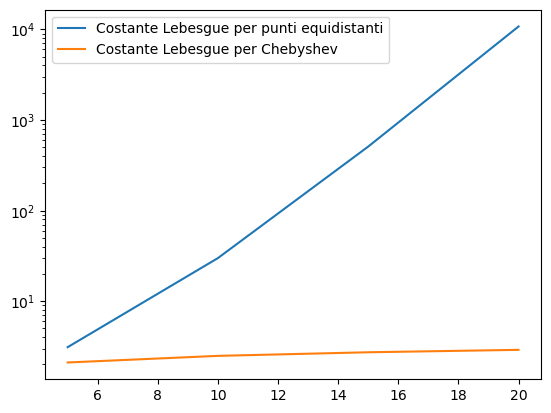

In [32]:
import numpy as np
xx=np.linspace(-1,1,200);
LLe=np.zeros((4,1));
LLc=np.zeros((4,1));


    
i=0;
for n in range(5,25,5):

    #nodi equispaziati
    xe=np.linspace(-1,1,n+1)
    #nodi di Chebyshev 
    xc=zeri_Cheb(-1,1,n)
    
    Le=np.zeros((200,1));
    Lc=np.zeros((200,1));
    for l in range (n+1):        
        pe=plagr(xe,l);
        Le=Le+np.abs(np.polyval(pe,xx))
        pc=plagr(xc,l)
        Lc=Lc+np.abs(np.polyval(pc,xx))
    
    LLe[i]=np.max(Le)
    LLc[i]=np.max(Lc)
    i=i+1
   

print('Costante di Lebesgue con nodi equispaziati al variare di n: \n ',LLe)
plt.semilogy(range(5,25,5), LLe,range(5,25,5),LLc)
plt.legend(["Costante Lebesgue per punti equidistanti","Costante Lebesgue per Chebyshev"])

 
print('Costante di Lebesgue con nodi di Chebyshev al variare di n: \n',LLc)

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


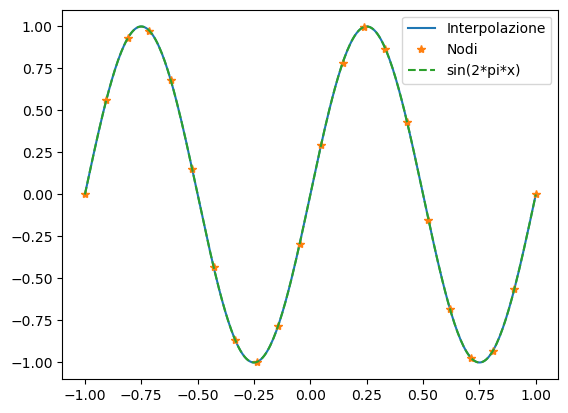

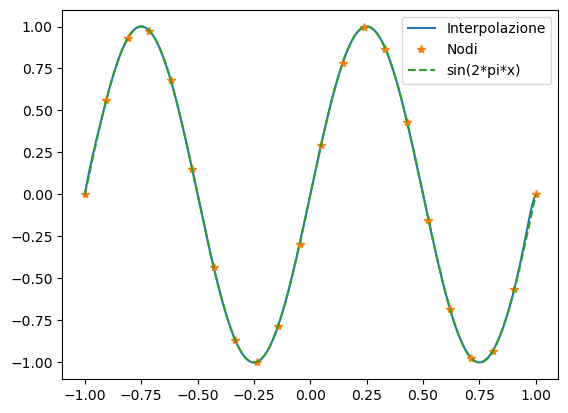

errore relativo sui dati 1.913526e-04
errore relativo sulle soluzioni 8.695690e-03


In [34]:
x = np.linspace(-1,1,22)
y = np.array([math.sin(2*math.pi*xi) for xi in x])
xx = np.linspace(-1,1,300)
yy = InterpL(x,y,xx)
yepsilone=y+0.0002*np.random.random(22,)  
yyepsilone = InterpL(x,yepsilone,xx)
plt.plot(xx,yy)
plt.plot(x,y,'*')
plt.plot(xx,np.sin(2*math.pi*xx),"--")
plt.legend(['Interpolazione','Nodi','sin(2*pi*x)'])
plt.show()
plt.plot(xx,yyepsilone)
plt.plot(x,y,'*')
plt.plot(xx,np.sin(2*math.pi*xx),"--")
plt.legend(['Interpolazione','Nodi','sin(2*pi*x)'])
plt.show()

print("errore relativo sui dati {:e}".format(np.linalg.norm(y-yepsilone)/np.linalg.norm(y)))
print("errore relativo sulle soluzioni {:e}".format(np.linalg.norm(yy-yyepsilone)/np.linalg.norm(yy)))
